# **Face mask detection using transfer learning**

### Importing required packages

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

### Plot an image from dataset

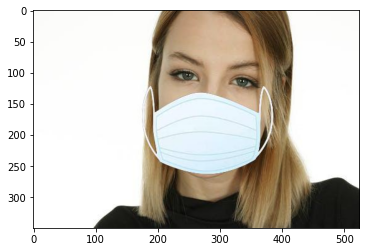

In [11]:
img = cv2.imread('Dataset/images/with_mask/1-with-mask.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
img.shape

(350, 525, 3)

We will resize all images to 224 x 224 which is the input size for MobileNet

In [13]:
size = 224

### Create dataset

In [20]:
directory = 'Dataset/images/'
classes = ['without_mask', 'with_mask']
data = []

for category in classes:
  path = os.path.join(directory, category)
  class_num = classes.index(category)
  for image in os.listdir(path):
    try:
      image_array = cv2.imread(os.path.join(path, image))
      image_array = cv2.resize(image_array, (size, size))
      data.append([image_array, class_num])
    except Exception as e:
      pass

In [37]:
print('Total images => ', len(data))

Total images =>  1424


Text(0.5, 1.0, 'Image class distribution')

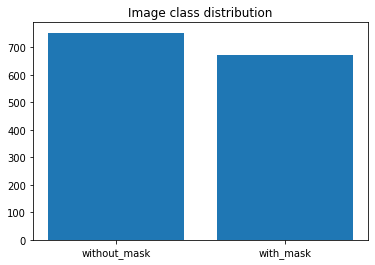

In [42]:
a = len(os.listdir(path))
b = len(data) - a
plt.bar(classes, [b, a])
plt.title("Image class distribution")

### Shuffle the dataset

In [22]:
import random
random.shuffle(data)

### Generate features and labels

In [23]:
x = []
y = []

for feature, label in data:
  x.append(feature)
  y.append(label)

x = np.array(x).reshape(-1, size, size, 3)

In [24]:
x.shape

(1424, 224, 224, 3)

In [25]:
x = x/255.0

In [26]:
y = np.array(y)

### Save processed data

In [27]:
import pickle
pickle_out = open('x.pickle', 'wb')
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
# pickle_in = open('x.pickle', 'rb')
# x = pickle.load(pickle_in)

# pickle_in = open('y.pickle', 'rb')
# y = pickle.load(pickle_in)

### Transfer learning

In [28]:
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
model = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [30]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

### Customize model

In [31]:
input = model.layers[0].input
output = model.layers[-4].output

In [32]:
flat = layers.Flatten()(output)
final = layers.Dense(1)(flat)
final = layers.Activation('sigmoid')(final)

In [33]:
custom_model = keras.Model(inputs = input, outputs = final)

In [34]:
custom_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit model on our dataset

In [35]:
custom_model.fit(x, y, epochs=1, validation_split=0.1)

41/41 [==============================] - 195s 5s/step - loss: 0.0851 - accuracy: 0.9750 - val_loss: 0.6382 - val_accuracy: 0.9371


### Save the model

In [36]:
custom_model.save('model.h5')